In [2]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Job Datsset.csv to Job Datsset.csv


KeyboardInterrupt: 

In [6]:
df = pd.read_csv("Job Datsset.csv")
df.head()

,User_ID,Job_ID,User_Skills,Job_Requirements,Match_Score,Recommended
0,1,16,"Python, C++, Machine Learning","SQL, CSS, AI, JavaScript, Data Science",0.620421,0
1,2,30,"AI, Python, Data Science","AI, Data Science, SQL, Python, CSS",0.823451,1
2,3,319,"CSS, Python, Machine Learning","SQL, AI, Python",0.703830,0
3,4,399,"SQL, Machine Learning, C++","Java, AI, Python, Data Science, Machine Learning",0.224724,0
4,5,405,"Machine Learning, HTML, JavaScript","Machine Learning, C++",0.296453,0


In [7]:
# Convert skills and job requirements to lowercase and remove extra spaces
df["User_Skills"] = df["User_Skills"].str.lower().str.replace(" ", "")
df["Job_Requirements"] = df["Job_Requirements"].str.lower().str.replace(" ", "")

In [8]:
# Convert lists of skills into string format for vectorization
df["User_Skills"] = df["User_Skills"].apply(lambda x: " ".join(x.split(",")))
df["Job_Requirements"] = df["Job_Requirements"].apply(lambda x: " ".join(x.split(",")))


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer()


In [11]:
# Fit and transform both user skills and job requirements
user_skills_tfidf = tfidf.fit_transform(df["User_Skills"])
job_requirements_tfidf = tfidf.transform(df["Job_Requirements"])

In [12]:
# Convert to DataFrame
user_skills_df = pd.DataFrame(user_skills_tfidf.toarray(), columns=tfidf.get_feature_names_out())
job_requirements_df = pd.DataFrame(job_requirements_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [13]:
# Concatenate processed features with the original dataset
processed_df = pd.concat([df[["User_ID", "Job_ID", "Match_Score", "Recommended"]], user_skills_df, job_requirements_df], axis=1)

In [14]:
 #Save preprocessed data
processed_df.to_csv("Job Datsset.csv", index=False)

print("Data Preprocessing Completed! Processed file saved as 'Processed_Job_Dataset.csv'")

Data Preprocessing Completed! Processed file saved as 'Processed_Job_Dataset.csv'


Collaborative filtering


In [15]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505179 sha256=43f6ab2d6068121d1dd3fbdbb9da7f16c578af0a73204a8a552774b43f22b3b4
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [16]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [17]:
# Define a reader for Surprise Library
reader = Reader(rating_scale=(0, 1))  # Match_Score ranges from 0 to 1
data = Dataset.load_from_df(df[["User_ID", "Job_ID", "Match_Score"]], reader)

In [18]:
# Split into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
# Train SVD model
model = SVD()
model.fit(trainset)

In [20]:
# Evaluate model performance
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Model RMSE: {rmse:.4f}")

RMSE: 0.2908
Model RMSE: 0.2908


In [21]:
# Function to recommend jobs for a user
def recommend_jobs(user_id, num_recommendations=5):
    job_ids = df["Job_ID"].unique()

    # Predict scores for all jobs for the given user
    predictions = [(job, model.predict(user_id, job).est) for job in job_ids]

    # Sort by predicted score
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top recommendations
    recommended_jobs = [job for job, _ in predictions[:num_recommendations]]
    return recommended_jobs


In [22]:
# Example usage: Get top 5 job recommendations for User_ID 1
user_id = 1
recommended_jobs = recommend_jobs(user_id)
print(f"Recommended Jobs for User {user_id}: {recommended_jobs}")

Recommended Jobs for User 1: [315, 102, 135, 49, 292]


content based filtering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [24]:
# Fill NaN values if any
df["User_Skills"].fillna("", inplace=True)
df["Job_Requirements"].fillna("", inplace=True)

# Convert skills and job requirements to lowercase and remove extra spaces
df["User_Skills"] = df["User_Skills"].str.lower().str.replace(" ", "")
df["Job_Requirements"] = df["Job_Requirements"].str.lower().str.replace(" ", "")

# Convert lists of skills into string format for vectorization
df["User_Skills"] = df["User_Skills"].apply(lambda x: " ".join(x.split(",")))
df["Job_Requirements"] = df["Job_Requirements"].apply(lambda x: " ".join(x.split(",")))


<ipython-input-24-5c83fc67a13a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["User_Skills"].fillna("", inplace=True)
<ipython-input-24-5c83fc67a13a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [25]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer()

# Fit and transform job requirements
job_tfidf = tfidf.fit_transform(df["Job_Requirements"])

# Function to recommend jobs based on user skills
def recommend_jobs(user_skills, num_recommendations=5):
    # Transform user skills using the same TF-IDF vectorizer
    user_tfidf = tfidf.transform([user_skills])

    # Compute cosine similarity between user skills and all job descriptions
    similarity_scores = cosine_similarity(user_tfidf, job_tfidf).flatten()

    # Get top job indices
    top_job_indices = similarity_scores.argsort()[::-1][:num_recommendations]

    # Retrieve recommended job IDs
    recommended_jobs = df.iloc[top_job_indices][["Job_ID", "Job_Requirements"]]
    return recommended_jobs

# Example usage: Get top 5 job recommendations for a user with specific skills
user_skills = "python, machine learning, data analysis"
recommended_jobs = recommend_jobs(user_skills)
print(f"Recommended Jobs:\n{recommended_jobs}")

Recommended Jobs:
       Job_ID Job_Requirements
72018      66        c++python
68886     400        c++python
82812       3        c++python
11130     313        c++python
25788     394        c++python


Hybrid - content + collaborative

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [27]:
# Fill missing values
df["User_Skills"].fillna("", inplace=True)
df["Job_Requirements"].fillna("", inplace=True)

# Convert to lowercase and remove extra spaces
df["User_Skills"] = df["User_Skills"].str.lower().str.replace(" ", "")
df["Job_Requirements"] = df["Job_Requirements"].str.lower().str.replace(" ", "")

# Convert skills list into string for TF-IDF
df["User_Skills"] = df["User_Skills"].apply(lambda x: " ".join(x.split(",")))
df["Job_Requirements"] = df["Job_Requirements"].apply(lambda x: " ".join(x.split(",")))

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
job_tfidf = tfidf.fit_transform(df["Job_Requirements"])

# Function for Content-Based Recommendation
def content_based_recommend(user_skills, num_recommendations=5):
    user_tfidf = tfidf.transform([user_skills])
    similarity_scores = cosine_similarity(user_tfidf, job_tfidf).flatten()
    top_job_indices = similarity_scores.argsort()[::-1][:num_recommendations]
    return {df.iloc[i]["Job_ID"]: similarity_scores[i] for i in top_job_indices}

# Collaborative Filtering with SVD
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(df[["User_ID", "Job_ID", "Match_Score"]], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

# Function for Collaborative Filtering Recommendation
def collaborative_recommend(user_id, num_recommendations=5):
    job_ids = df["Job_ID"].unique()
    predictions = [(job, model.predict(user_id, job).est) for job in job_ids]
    predictions.sort(key=lambda x: x[1], reverse=True)
    return {job: score for job, score in predictions[:num_recommendations]}

# Hybrid Recommendation Function
def hybrid_recommend(user_id, user_skills, num_recommendations=5, alpha=0.5):
    content_scores = content_based_recommend(user_skills, num_recommendations)
    collab_scores = collaborative_recommend(user_id, num_recommendations)

    # Normalize scores
    max_content = max(content_scores.values()) if content_scores else 1
    max_collab = max(collab_scores.values()) if collab_scores else 1
    for job in content_scores:
        content_scores[job] /= max_content
    for job in collab_scores:
        collab_scores[job] /= max_collab

    # Merge and weight scores
    final_scores = {}
    for job in set(content_scores.keys()).union(set(collab_scores.keys())):
        final_scores[job] = alpha * content_scores.get(job, 0) + (1 - alpha) * collab_scores.get(job, 0)

    # Sort and return top recommendations
    recommended_jobs = sorted(final_scores.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]
    return [job for job, _ in recommended_jobs]

# Example Usage
user_id = 1
user_skills = "python, machine learning, data analysis"
recommended_jobs = hybrid_recommend(user_id, user_skills)
print(f"Hybrid Recommended Jobs for User {user_id}: {recommended_jobs}")

<ipython-input-27-e17376b9647b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["User_Skills"].fillna("", inplace=True)
<ipython-input-27-e17376b9647b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Hybrid Recommended Jobs for User 1: [66, 3, 294, 394, 400]


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [29]:
print(df.columns)

Index(['User_ID', 'Job_ID', 'User_Skills', 'Job_Requirements', 'Match_Score',
       'Recommended'],
      dtype='object')


In [30]:
# Fill missing values in job descriptions
df["Job_Requirements"].fillna("", inplace=True)

# Convert job descriptions to lowercase
df["Job_Requirements"] = df["Job_Requirements"].str.lower()

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X = tfidf.fit_transform(df["Job_Requirements"])

# Apply K-Means Clustering
num_clusters = 5  # Adjust based on dataset size
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Job_Category"] = kmeans.fit_predict(X)

# Display sample data with assigned categories
print(df[["Job_Requirements", "Job_Category"]].head())

# Save the categorized dataset
df.to_csv("Job Datsset.csv", index=False)

<ipython-input-30-f3848fae6179>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Job_Requirements"].fillna("", inplace=True)


                         Job_Requirements  Job_Category
0           sqlcssaijavascriptdatascience             3
1               aidatasciencesqlpythoncss             3
2                             sqlaipython             3
3  javaaipythondatasciencemachinelearning             3
4                      machinelearningc++             3


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier with class weighting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight="balanced")
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on Test Data
y_pred = rf_model.predict(X_test)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9676
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14         8
           1       0.06      1.00      0.12         9
           2       0.02      1.00      0.05         9
           3       1.00      0.97      0.98     19898
           4       0.59      1.00      0.75        76

    accuracy                           0.97     20000
   macro avg       0.35      0.99      0.41     20000
weighted avg       1.00      0.97      0.98     20000



In [40]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.9804


In [41]:
def predict_job_category(job_desc):
    job_desc_tfidf = tfidf.transform([job_desc.lower()])
    category_index = rf_model.predict(job_desc_tfidf)[0]
    return category_index

# Example Usage
job_description = "Looking for a Python developer with experience in AI and ML."
predicted_category = predict_job_category(job_description)
print(f"Predicted Job Category: {predicted_category}")

Predicted Job Category: 3


Evaluation

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.14         8
           1       0.06      1.00      0.12         9
           2       0.02      1.00      0.05         9
           3       1.00      0.97      0.98     19898
           4       0.59      1.00      0.75        76

    accuracy                           0.97     20000
   macro avg       0.35      0.99      0.41     20000
weighted avg       1.00      0.97      0.98     20000



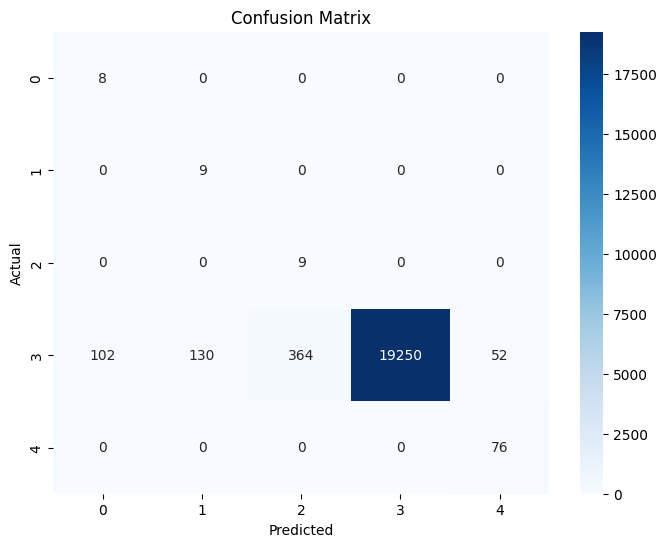

In [43]:
# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()